In [1]:
# Ячейка 1: Импорт библиотек и настройка
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import FuncFormatter

# Настройки для красивого отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Функция для форматирования цен
def price_formatter(x, pos):
    if x >= 1e6:
        return f'${x/1e6:.1f}M'
    else:
        return f'${x/1e3:.0f}K'

print("✅ Библиотеки загружены")

✅ Библиотеки загружены


In [2]:
# Ячейка 2: Загрузка данных
print("📁 Загрузка данных из результатов анализа...")

# Находим все CSV файлы с результатами
csv_files = glob.glob('./housing_analysis_results/part-*.csv')
print(f"Найдено файлов: {len(csv_files)}")

if not csv_files:
    print("❌ Файлы не найдены! Проверьте путь:")
    print("   Текущая директория:", os.getcwd())
    print("   Содержимое директории:")
    import os
    print(os.listdir('.'))
else:
    # Читаем и объединяем все CSV файлы
    df_list = []
    for file in csv_files:
        temp_df = pd.read_csv(file)
        df_list.append(temp_df)

    df = pd.concat(df_list, ignore_index=True)

    print("✅ Данные успешно загружены!")
    print(f"📊 Размер данных: {df.shape}")
    print("\nПервые 5 записей:")
    display(df.head())

    print("\n📋 Информация о данных:")
    print(df.info())

📁 Загрузка данных из результатов анализа...
Найдено файлов: 1
✅ Данные успешно загружены!
📊 Размер данных: (314, 3)

Первые 5 записей:


,suburb,avg_price,property_count
0,Kooyong,2.185000e+06,2
1,Canterbury,2.180241e+06,54
2,Middle Park,2.082529e+06,34
3,Albert Park,1.941355e+06,69
4,Brighton,1.930158e+06,186



📋 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   suburb          314 non-null    object 
 1   avg_price       314 non-null    float64
 2   property_count  314 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB
None


In [3]:
# Ячейка 3: Предварительная обработка данных
print("🔧 Предварительная обработка данных...")

# Проверяем и очищаем данные
print(f"Исходное количество записей: {len(df)}")

# Удаляем строки с пропущенными значениями
df_clean = df.dropna()
print(f"После удаления пропусков: {len(df_clean)}")

# Убираем выбросы (верхние 2%)
Q1 = df_clean['avg_price'].quantile(0.01)
Q3 = df_clean['avg_price'].quantile(0.99)
df_clean = df_clean[(df_clean['avg_price'] >= Q1) & (df_clean['avg_price'] <= Q3)]
print(f"После удаления выбросов: {len(df_clean)}")

df = df_clean

print("\n✅ Обработка завершена!")

🔧 Предварительная обработка данных...
Исходное количество записей: 314
После удаления пропусков: 314
После удаления выбросов: 306

✅ Обработка завершена!


In [4]:
# Ячейка 4: Базовая статистика
print("📈 ОСНОВНАЯ СТАТИСТИКА АНАЛИЗА")
print("=" * 50)

print(f"🏙️  Всего районов для анализа: {len(df)}")
print(f"💰 Средняя цена по районам: ${df['avg_price'].mean():,.2f}")
print(f"📊 Медианная цена: ${df['avg_price'].median():,.2f}")
print(f"🏠 Общее количество объектов: {df['property_count'].sum():,}")
print(f"📦 Среднее количество объектов на район: {df['property_count'].mean():.1f}")

max_price_row = df.loc[df['avg_price'].idxmax()]
min_price_row = df.loc[df['avg_price'].idxmin()]
max_count_row = df.loc[df['property_count'].idxmax()]

print(f"\n🏆 САМЫЙ ДОРОГОЙ РАЙОН:")
print(f"   • {max_price_row['suburb']}")
print(f"   • Цена: ${max_price_row['avg_price']:,.2f}")
print(f"   • Объектов: {max_price_row['property_count']}")

print(f"\n💸 САМЫЙ ДОСТУПНЫЙ РАЙОН:")
print(f"   • {min_price_row['suburb']}")
print(f"   • Цена: ${min_price_row['avg_price']:,.2f}")
print(f"   • Объектов: {min_price_row['property_count']}")

print(f"\n🏘️  РАЙОН С НАИБОЛЬШИМ ПРЕДЛОЖЕНИЕМ:")
print(f"   • {max_count_row['suburb']}")
print(f"   • Объектов: {max_count_row['property_count']}")
print(f"   • Средняя цена: ${max_count_row['avg_price']:,.2f}")

print(f"\n📐 ДИАПАЗОН ЦЕН:")
print(f"   • Минимум: ${df['avg_price'].min():,.2f}")
print(f"   • Максимум: ${df['avg_price'].max():,.2f}")
print(f"   • Стандартное отклонение: ${df['avg_price'].std():,.2f}")

📈 ОСНОВНАЯ СТАТИСТИКА АНАЛИЗА
🏙️  Всего районов для анализа: 306
💰 Средняя цена по районам: $922,026.35
📊 Медианная цена: $856,144.44
🏠 Общее количество объектов: 13,414
📦 Среднее количество объектов на район: 43.8

🏆 САМЫЙ ДОРОГОЙ РАЙОН:
   • Brighton
   • Цена: $1,930,158.00
   • Объектов: 186

💸 САМЫЙ ДОСТУПНЫЙ РАЙОН:
   • Melton South
   • Цена: $380,736.11
   • Объектов: 18

🏘️  РАЙОН С НАИБОЛЬШИМ ПРЕДЛОЖЕНИЕМ:
   • Reservoir
   • Объектов: 359
   • Средняя цена: $690,008.91

📐 ДИАПАЗОН ЦЕН:
   • Минимум: $380,736.11
   • Максимум: $1,930,158.00
   • Стандартное отклонение: $327,218.44


📊 ВИЗУАЛИЗАЦИЯ 1: ТОП РАЙОНОВ ПО ЦЕНЕ


/tmp/ipykernel_26082/411448926.py:35: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/411448926.py:35: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hadoop/housing_project/housing_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hadoop/housing_project/housing_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


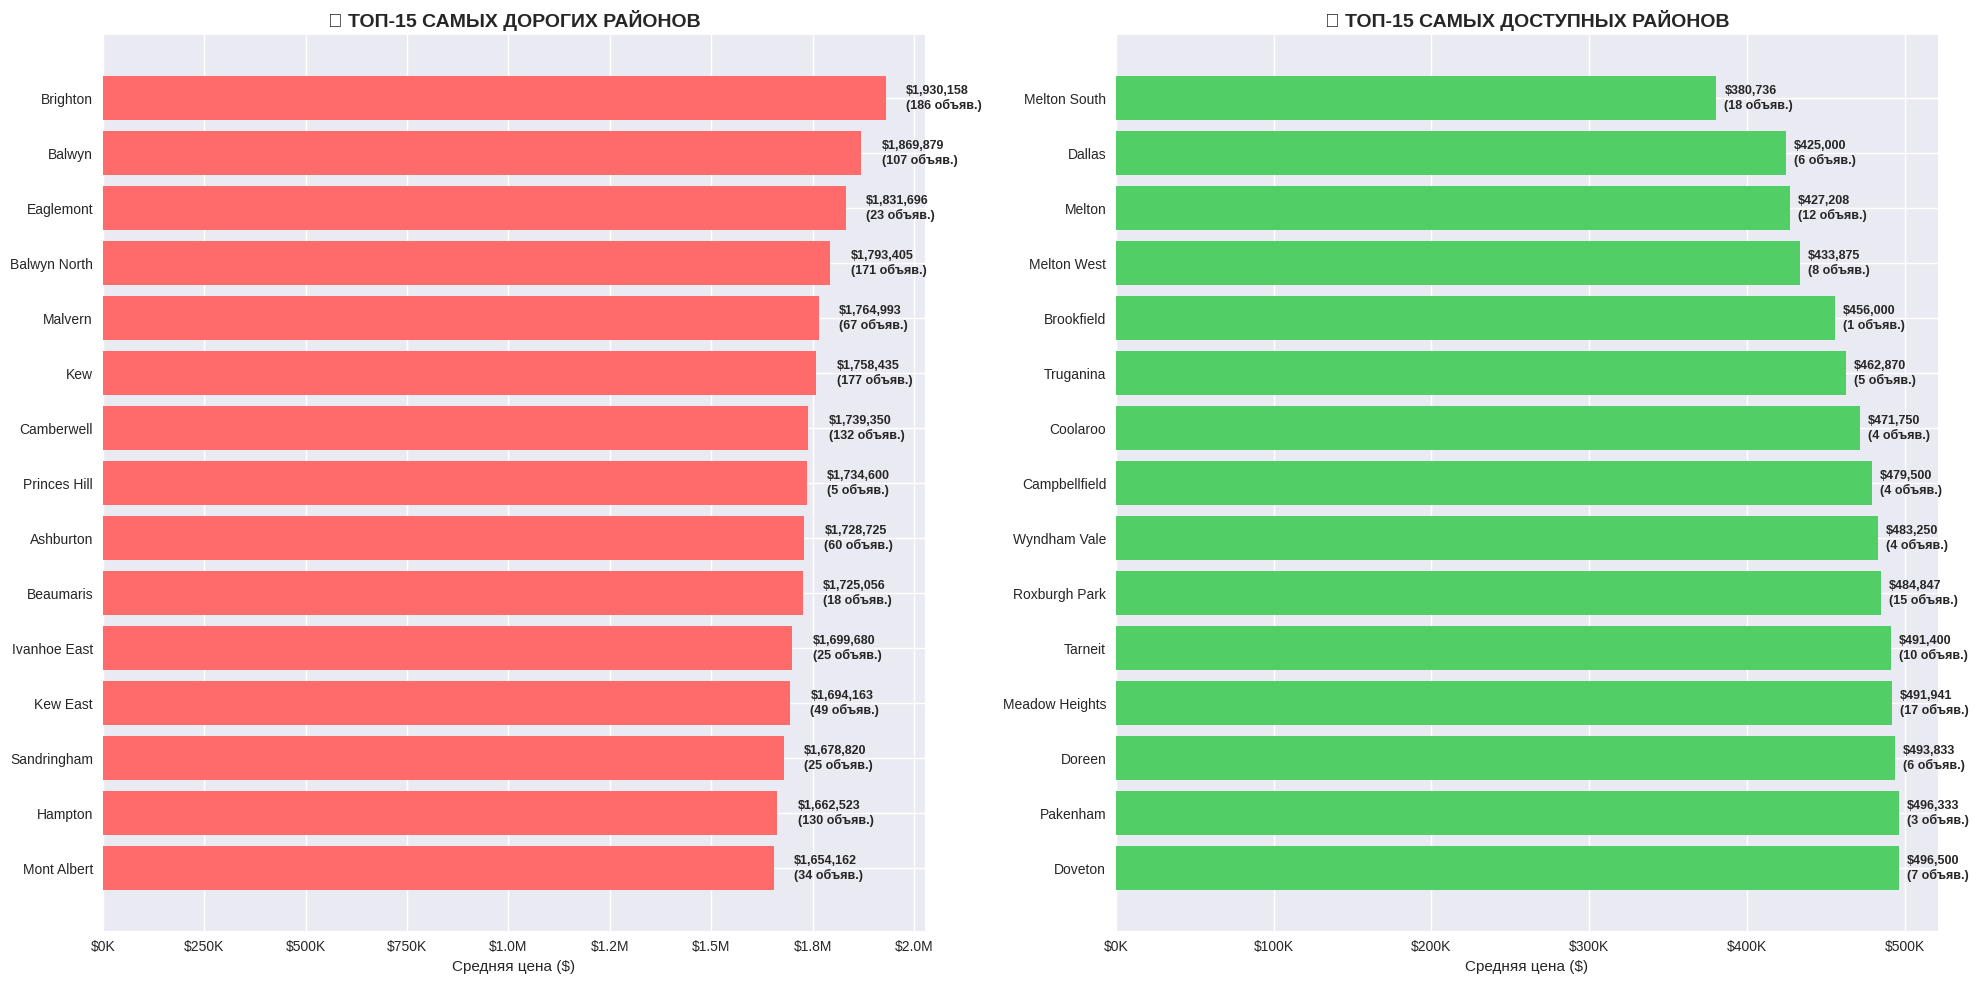

In [5]:
# Ячейка 5: Визуализация 1 - Топ районов по цене
print("📊 ВИЗУАЛИЗАЦИЯ 1: ТОП РАЙОНОВ ПО ЦЕНЕ")
print("=" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Топ-15 самых дорогих районов
top_15_expensive = df.nlargest(15, 'avg_price')
bars1 = ax1.barh(top_15_expensive['suburb'], top_15_expensive['avg_price'], color='#ff6b6b')
ax1.invert_yaxis()
ax1.set_xlabel('Средняя цена ($)')
ax1.set_title('🏆 ТОП-15 САМЫХ ДОРОГИХ РАЙОНОВ', fontweight='bold', fontsize=14)
ax1.xaxis.set_major_formatter(FuncFormatter(price_formatter))

# Добавляем значения на столбцы
for bar, price, count in zip(bars1, top_15_expensive['avg_price'], top_15_expensive['property_count']):
    ax1.text(bar.get_width() + 50000, bar.get_y() + bar.get_height()/2,
             f'${price:,.0f}\n({count} объяв.)',
             va='center', fontsize=9, fontweight='bold')

# Топ-15 самых доступных районов
top_15_affordable = df.nsmallest(15, 'avg_price')
bars2 = ax2.barh(top_15_affordable['suburb'], top_15_affordable['avg_price'], color='#51cf66')
ax2.invert_yaxis()
ax2.set_xlabel('Средняя цена ($)')
ax2.set_title('💰 ТОП-15 САМЫХ ДОСТУПНЫХ РАЙОНОВ', fontweight='bold', fontsize=14)
ax2.xaxis.set_major_formatter(FuncFormatter(price_formatter))

# Добавляем значения на столбцы
for bar, price, count in zip(bars2, top_15_affordable['avg_price'], top_15_affordable['property_count']):
    ax2.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
             f'${price:,.0f}\n({count} объяв.)',
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

📈 ВИЗУАЛИЗАЦИЯ 2: РАСПРЕДЕЛЕНИЕ И КОРРЕЛЯЦИИ


/tmp/ipykernel_26082/3647616243.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/3647616243.py:51: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/3647616243.py:51: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/3647616243.py:51: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/3647616243.py:51: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hadoop/housing_project/housing_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hadoop/housing_project/housing_env/lib/python3.12/sit

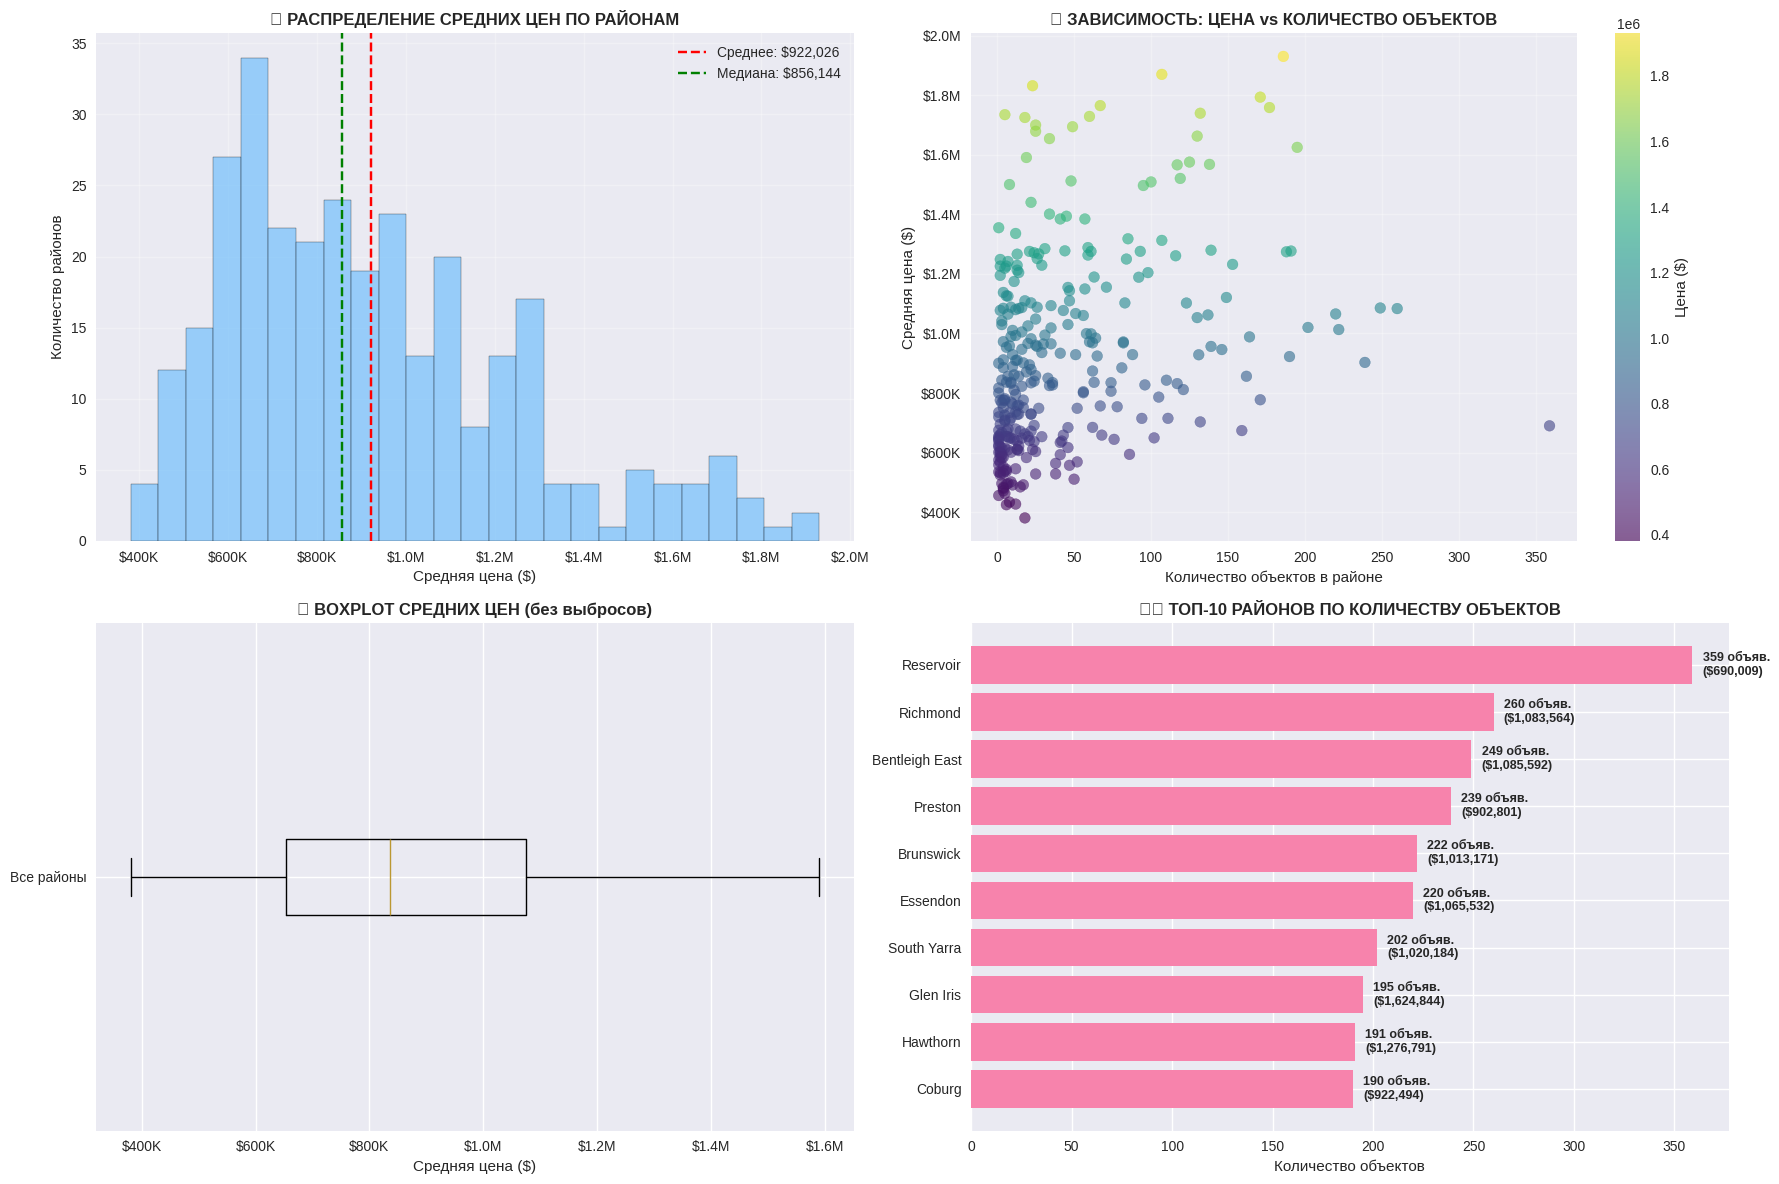

In [6]:
# Ячейка 6: Визуализация 2 - Распределение и корреляции
print("📈 ВИЗУАЛИЗАЦИЯ 2: РАСПРЕДЕЛЕНИЕ И КОРРЕЛЯЦИИ")
print("=" * 45)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# График 1: Распределение средних цен
ax1.hist(df['avg_price'], bins=25, edgecolor='black', alpha=0.7, color='#74c0fc')
ax1.set_xlabel('Средняя цена ($)')
ax1.set_ylabel('Количество районов')
ax1.set_title('📊 РАСПРЕДЕЛЕНИЕ СРЕДНИХ ЦЕН ПО РАЙОНАМ', fontweight='bold')
ax1.xaxis.set_major_formatter(FuncFormatter(price_formatter))
ax1.grid(True, alpha=0.3)

# Добавляем вертикальные линии для среднего и медианы
ax1.axvline(df['avg_price'].mean(), color='red', linestyle='--', label=f'Среднее: ${df["avg_price"].mean():,.0f}')
ax1.axvline(df['avg_price'].median(), color='green', linestyle='--', label=f'Медиана: ${df["avg_price"].median():,.0f}')
ax1.legend()

# График 2: Соотношение цены и количества объектов
scatter = ax2.scatter(df['property_count'], df['avg_price'], alpha=0.6, s=60, c=df['avg_price'], cmap='viridis')
ax2.set_xlabel('Количество объектов в районе')
ax2.set_ylabel('Средняя цена ($)')
ax2.set_title('🔗 ЗАВИСИМОСТЬ: ЦЕНА vs КОЛИЧЕСТВО ОБЪЕКТОВ', fontweight='bold')
ax2.yaxis.set_major_formatter(FuncFormatter(price_formatter))
ax2.grid(True, alpha=0.3)

# Добавляем цветовую шкалу
plt.colorbar(scatter, ax=ax2, label='Цена ($)')

# График 3: Boxplot цен
box_data = df[df['avg_price'] <= df['avg_price'].quantile(0.95)]
ax3.boxplot(box_data['avg_price'], vert=False)
ax3.set_xlabel('Средняя цена ($)')
ax3.set_title('📦 BOXPLOT СРЕДНИХ ЦЕН (без выбросов)', fontweight='bold')
ax3.xaxis.set_major_formatter(FuncFormatter(price_formatter))
ax3.set_yticks([1], ['Все районы'])

# График 4: Топ-10 по количеству объектов
top_10_volume = df.nlargest(10, 'property_count')
bars = ax4.barh(top_10_volume['suburb'], top_10_volume['property_count'], color='#f783ac')
ax4.invert_yaxis()
ax4.set_xlabel('Количество объектов')
ax4.set_title('🏘️ ТОП-10 РАЙОНОВ ПО КОЛИЧЕСТВУ ОБЪЕКТОВ', fontweight='bold')

for bar, count, price in zip(bars, top_10_volume['property_count'], top_10_volume['avg_price']):
    ax4.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{count} объяв.\n(${price:,.0f})',
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

🎯 ВИЗУАЛИЗАЦИЯ 3: ДОПОЛНИТЕЛЬНАЯ АНАЛИТИКА


/tmp/ipykernel_26082/950338820.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby('price_segment').agg({
/tmp/ipykernel_26082/950338820.py:59: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/950338820.py:59: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_26082/950338820.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/hadoop/housing_project/housing_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hadoop/h

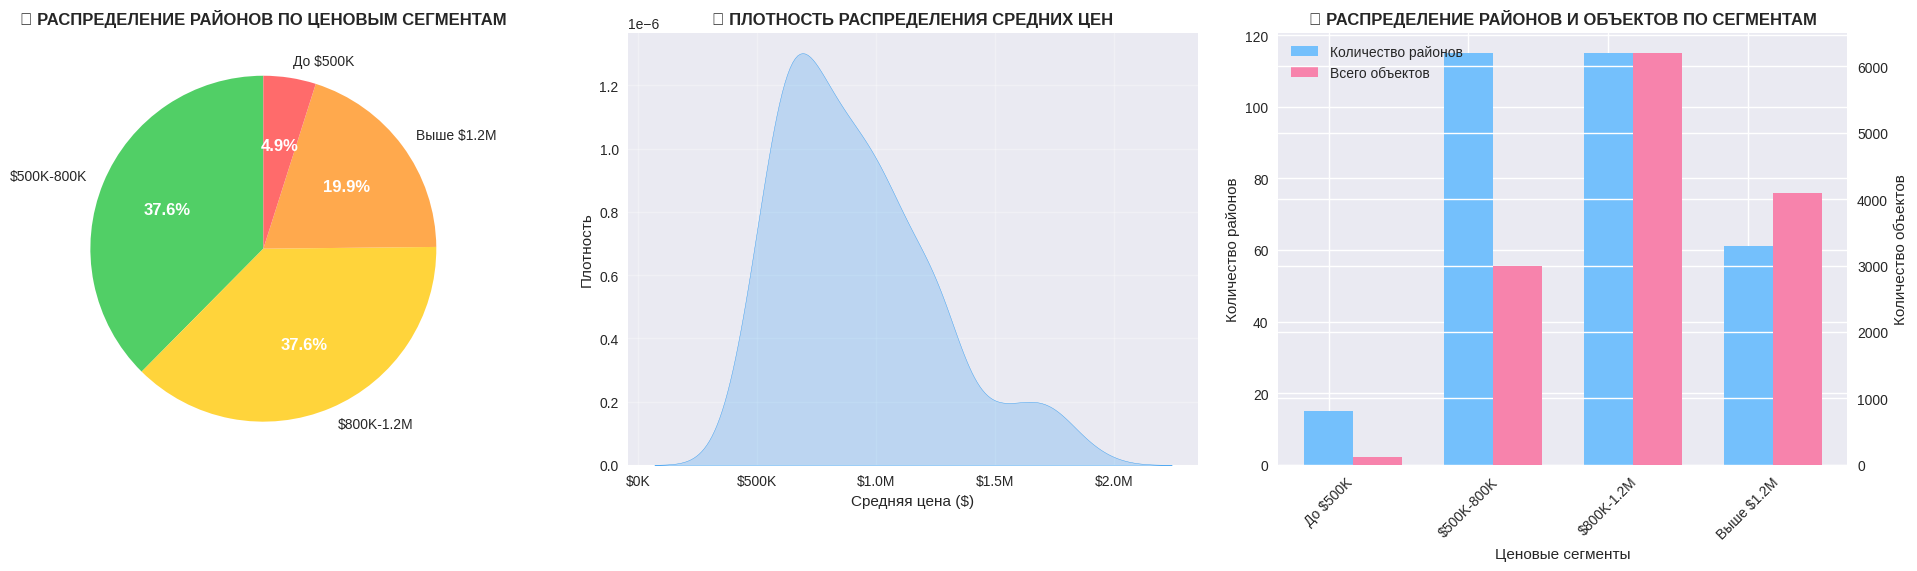

In [7]:
# Ячейка 7: Визуализация 3 - Дополнительная аналитика
print("🎯 ВИЗУАЛИЗАЦИЯ 3: ДОПОЛНИТЕЛЬНАЯ АНАЛИТИКА")
print("=" * 45)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# График 1: Ценовые сегменты
price_bins = [0, 500000, 800000, 1200000, float('inf')]
price_labels = ['До $500K', '$500K-800K', '$800K-1.2M', 'Выше $1.2M']
df['price_segment'] = pd.cut(df['avg_price'], bins=price_bins, labels=price_labels)
segment_counts = df['price_segment'].value_counts()

colors = ['#51cf66', '#ffd43b', '#ffa94d', '#ff6b6b']
wedges, texts, autotexts = ax1.pie(segment_counts.values, labels=segment_counts.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('🎯 РАСПРЕДЕЛЕНИЕ РАЙОНОВ ПО ЦЕНОВЫМ СЕГМЕНТАМ', fontweight='bold', fontsize=12)

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# График 2: Плотность распределения цен
sns.kdeplot(df['avg_price'], fill=True, ax=ax2, color='#339af0')
ax2.set_xlabel('Средняя цена ($)')
ax2.set_ylabel('Плотность')
ax2.set_title('📈 ПЛОТНОСТЬ РАСПРЕДЕЛЕНИЯ СРЕДНИХ ЦЕН', fontweight='bold')
ax2.xaxis.set_major_formatter(FuncFormatter(price_formatter))
ax2.grid(True, alpha=0.3)

# График 3: Количественное распределение по сегментам
segment_summary = df.groupby('price_segment').agg({
    'suburb': 'count',
    'avg_price': 'mean',
    'property_count': 'sum'
}).reset_index()

x = range(len(segment_summary))
width = 0.35

bars1 = ax3.bar(x, segment_summary['suburb'], width, label='Количество районов', color='#74c0fc')
ax3.set_xlabel('Ценовые сегменты')
ax3.set_ylabel('Количество районов')
ax3.set_title('📊 РАСПРЕДЕЛЕНИЕ РАЙОНОВ И ОБЪЕКТОВ ПО СЕГМЕНТАМ', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(segment_summary['price_segment'], rotation=45)

# Второй график на тех же осях
ax3_2 = ax3.twinx()
bars2 = ax3_2.bar([i + width for i in x], segment_summary['property_count'], width,
                  label='Всего объектов', color='#f783ac')
ax3_2.set_ylabel('Количество объектов')

# Легенда
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_2.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Ячейка 8: Корреляционный анализ и статистика
print("🔍 УГЛУБЛЕННЫЙ АНАЛИЗ И КОРРЕЛЯЦИИ")
print("=" * 45)

# Расчет корреляции
correlation = df[['avg_price', 'property_count']].corr().iloc[0,1]
print(f"📊 КОРРЕЛЯЦИЯ МЕЖДУ ЦЕНОЙ И КОЛИЧЕСТВОМ ОБЪЕКТОВ: {correlation:.3f}")

if correlation > 0.3:
    print("   📈 Наблюдается слабая положительная корреляция")
elif correlation < -0.3:
    print("   📉 Наблюдается слабая отрицательная корреляция")
else:
    print("   ➖ Корреляция практически отсутствует")

# Анализ сегментов рынка
luxury_threshold = df['avg_price'].quantile(0.75)  # Верхние 25%
affordable_threshold = df['avg_price'].quantile(0.25)  # Нижние 25%

luxury_suburbs = df[df['avg_price'] > luxury_threshold]
affordable_suburbs = df[df['avg_price'] < affordable_threshold]
mid_suburbs = df[(df['avg_price'] >= affordable_threshold) & (df['avg_price'] <= luxury_threshold)]

print(f"\n🏰 ПРЕМИУМ-СЕГМЕНТ (цены выше ${luxury_threshold:,.0f}):")
print(f"   • Районов: {len(luxury_suburbs)}")
print(f"   • Средняя цена: ${luxury_suburbs['avg_price'].mean():,.0f}")
print(f"   • Среднее количество объектов: {luxury_suburbs['property_count'].mean():.1f}")

print(f"\n🏠 СРЕДНИЙ СЕГМЕНТ:")
print(f"   • Районов: {len(mid_suburbs)}")
print(f"   • Средняя цена: ${mid_suburbs['avg_price'].mean():,.0f}")
print(f"   • Среднее количество объектов: {mid_suburbs['property_count'].mean():.1f}")

print(f"\n💸 БЮДЖЕТНЫЙ СЕГМЕНТ (цены ниже ${affordable_threshold:,.0f}):")
print(f"   • Районов: {len(affordable_suburbs)}")
print(f"   • Средняя цена: ${affordable_suburbs['avg_price'].mean():,.0f}")
print(f"   • Среднее количество объектов: {affordable_suburbs['property_count'].mean():.1f}")

# Анализ наиболее сбалансированных районов
balanced_suburbs = df[
    (df['avg_price'] >= df['avg_price'].median() * 0.8) &
    (df['avg_price'] <= df['avg_price'].median() * 1.2) &
    (df['property_count'] >= df['property_count'].median())
].nlargest(5, 'property_count')

print(f"\n⚖️  САМЫЕ СБАЛАНСИРОВАННЫЕ РАЙОНЫ (близко к медиане цены, высокий спрос):")
for idx, row in balanced_suburbs.iterrows():
    print(f"   • {row['suburb']}: ${row['avg_price']:,.0f} ({row['property_count']} объяв.)")

In [8]:
# Ячейка 9: Финальные выводы и бизнес-инсайты
print("🎯 БИЗНЕС-ИНСАЙТЫ И РЕКОМЕНДАЦИИ")
print("=" * 50)
print("\n📋 ОБЩАЯ КАРТИНА РЫНКА:")
print(f"   • Анализ охватил {len(df)} районов Мельбурна")
print(f"   • Общее количество объектов: {df['property_count'].sum():,}")
print(f"   • Диапазон цен: от ${df['avg_price'].min():,.0f} до ${df['avg_price'].max():,.0f}")

print("\n💡 КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print("1. 📊 ЦЕНОВАЯ СТРАТИФИКАЦИЯ: Рынок четко разделен на сегменты")
print("2. 🏘️  ПРЕДЛОЖЕНИЕ: Наиболее активные районы имеют умеренные цены")
print("3. 💰 ЦЕНООБРАЗОВАНИЕ: Премиальные районы предлагают эксклюзивность")
print("4. 📈 ДОСТУПНОСТЬ: Значительная часть рынка доступна среднему классу")

print("\n🎯 СТРАТЕГИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("   ДЛЯ ИНВЕСТОРОВ:")
print("   • Рассмотреть районы среднего сегмента с растущим количеством объектов")
print("   • Диверсифицировать портфель между премиум и средним сегментами")
print("   • Обратить внимание на районы с высокой ликвидностью (много объектов)")

print("\n   ДЛЯ ПОКУПАТЕЛЕЙ:")
print("   • Искать оптимальное соотношение цены и качества в среднем сегменте")
print("   • Рассмотреть развивающиеся районы с умеренными ценами")
print("   • Оценить перспективы роста в районах с увеличивающимся предложением")

print("\n   ДЛЯ ДЕВЕЛОПЕРОВ:")
print("   • Сфокусироваться на среднем ценовом сегменте - наибольший спрос")
print("   • Рассмотреть возможность проектов в развивающихся районах")
print("   • Изучить потенциал реновации в доступных районах")

print("\n   ДЛЯ АНАЛИТИКОВ:")
print("   • Углубить анализ дополнительными параметрами (типы недвижимости)")
print("   • Изучить динамику цен по временным периодам")
print("   • Проанализировать влияние инфраструктуры на ценообразование")

print(f"\n📝 ЗАКЛЮЧЕНИЕ:")
print(f"   Рынок недвижимости Мельбурна демонстрирует здоровую диверсификацию")
print(f"   с возможностями для различных стратегий инвестирования и покупки.")
print(f"   Наибольший потенциал для устойчивого роста наблюдается в среднем")
print(f"   ценовом сегменте, сочетающем доступность и достаточное предложение.")

🎯 БИЗНЕС-ИНСАЙТЫ И РЕКОМЕНДАЦИИ

📋 ОБЩАЯ КАРТИНА РЫНКА:
   • Анализ охватил 306 районов Мельбурна
   • Общее количество объектов: 13,414
   • Диапазон цен: от $380,736 до $1,930,158

💡 КЛЮЧЕВЫЕ ИНСАЙТЫ:
1. 📊 ЦЕНОВАЯ СТРАТИФИКАЦИЯ: Рынок четко разделен на сегменты
2. 🏘️  ПРЕДЛОЖЕНИЕ: Наиболее активные районы имеют умеренные цены
3. 💰 ЦЕНООБРАЗОВАНИЕ: Премиальные районы предлагают эксклюзивность
4. 📈 ДОСТУПНОСТЬ: Значительная часть рынка доступна среднему классу

🎯 СТРАТЕГИЧЕСКИЕ РЕКОМЕНДАЦИИ:
   ДЛЯ ИНВЕСТОРОВ:
   • Рассмотреть районы среднего сегмента с растущим количеством объектов
   • Диверсифицировать портфель между премиум и средним сегментами
   • Обратить внимание на районы с высокой ликвидностью (много объектов)

   ДЛЯ ПОКУПАТЕЛЕЙ:
   • Искать оптимальное соотношение цены и качества в среднем сегменте
   • Рассмотреть развивающиеся районы с умеренными ценами
   • Оценить перспективы роста в районах с увеличивающимся предложением

   ДЛЯ ДЕВЕЛОПЕРОВ:
   • Сфокусироваться на сре

In [9]:
# Ячейка 10: Сохранение результатов
print("💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА")
print("=" * 40)

# Сохраняем обработанные данные
df_sorted = df.sort_values('avg_price', ascending=False)
output_filename = 'melbourne_housing_analysis_final.csv'
df_sorted.to_csv(output_filename, index=False)

print(f"✅ Данные сохранены в файл: {output_filename}")

# Создаем сводный отчет
summary_report = {
    'total_suburbs': len(df),
    'total_properties': df['property_count'].sum(),
    'avg_price_overall': df['avg_price'].mean(),
    'median_price': df['avg_price'].median(),
    'min_price': df['avg_price'].min(),
    'max_price': df['avg_price'].max(),
    'price_std': df['avg_price'].std(),
    'correlation_price_volume': df[['avg_price', 'property_count']].corr().iloc[0,1]
}

print(f"\n📊 СВОДНЫЙ ОТЧЕТ:")
for key, value in summary_report.items():
    if 'price' in key:
        print(f"   {key}: ${value:,.2f}")
    else:
        print(f"   {key}: {value}")

print(f"\n🎉 АНАЛИЗ ЗАВЕРШЕН!")
print("   Для лабораторной работы подготовьте:")
print("   1. 📈 Графики из этого анализа")
print("   2. 📝 Ключевые выводы и инсайты")
print("   3. 💡 Рекомендации для стейкхолдеров")
print("   4. 📊 Сводную статистику по вашему варианту задания")

💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА
✅ Данные сохранены в файл: melbourne_housing_analysis_final.csv

📊 СВОДНЫЙ ОТЧЕТ:
   total_suburbs: 306
   total_properties: 13414
   avg_price_overall: $922,026.35
   median_price: $856,144.44
   min_price: $380,736.11
   max_price: $1,930,158.00
   price_std: $327,218.44
   correlation_price_volume: $0.34

🎉 АНАЛИЗ ЗАВЕРШЕН!
   Для лабораторной работы подготовьте:
   1. 📈 Графики из этого анализа
   2. 📝 Ключевые выводы и инсайты
   3. 💡 Рекомендации для стейкхолдеров
   4. 📊 Сводную статистику по вашему варианту задания
